# 7. Continuous Data Fine Preprocessing

Content include:
 - preprocessing and joining up external data
 - joining with taxi data
 - EDA on aggregated data
 - Plotting
 - One hot encoding of some variables (DULocation and PULocation one hot encoding too large to store, done on the fly in modelbulding scripts)
 - Standardisation
 - Train Test Split
 - Attempted PCA
 - Feature Selection

In [1]:
import datetime

import pandas as pd
import numpy as np
import statistics as s
import os
import matplotlib.pyplot as plt

## Add external data

### Weather - inner join onto csv

In [2]:
weather_data = pd.read_csv('../data/raw/Weather/new york 2016-01-01 to 2017-12-31.csv')

# Drop unnecessary rows
weather_data = weather_data.drop(['name', 'description','icon',
                                  'stations', 'severerisk'], axis = 1)

In [3]:
# Transform data into correct types and replace none with correct labels
weather_data['preciptype'] = weather_data['preciptype'].replace(np.nan, 'none')
weather_data.datetime = pd.to_datetime(weather_data.datetime).dt.date
weather_data

,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,...,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,sunrise,sunset,moonphase,conditions
0,2016-01-01,5.8,1.7,4.1,3.5,-3.1,0.6,-4.6,53.2,0.00,...,1016.9,71.7,16.0,71.1,6.1,4,2016-01-01T07:20:07,2016-01-01T16:38:54,0.72,Partially cloudy
1,2016-01-02,4.4,0.7,2.2,2.5,-4.1,-1.3,-7.7,48.0,0.00,...,1016.8,43.0,16.0,107.9,9.2,5,2016-01-02T07:20:13,2016-01-02T16:39:45,0.77,Partially cloudy
2,2016-01-03,7.2,1.6,3.9,4.1,-2.5,0.4,-5.9,49.5,0.00,...,1011.2,19.8,16.0,109.9,9.6,5,2016-01-03T07:20:17,2016-01-03T16:40:37,0.81,Clear
3,2016-01-04,2.4,-9.2,-2.3,-1.0,-18.0,-8.1,-12.3,47.0,0.00,...,1017.7,42.8,16.0,113.0,9.8,5,2016-01-04T07:20:19,2016-01-04T16:41:30,0.86,Partially cloudy
4,2016-01-05,-1.8,-11.3,-6.3,-1.8,-20.4,-11.0,-18.5,39.8,0.00,...,1034.5,3.9,16.0,118.8,10.4,5,2016-01-05T07:20:19,2016-01-05T16:42:25,0.90,Clear
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,2017-12-27,-4.2,-7.6,-6.0,-9.4,-14.5,-11.8,-17.1,41.3,0.00,...,1032.0,40.3,16.0,92.1,7.9,4,2017-12-27T07:19:10,2017-12-27T16:35:28,0.31,Partially cloudy
727,2017-12-28,-7.5,-11.0,-9.1,-14.5,-18.4,-16.5,-19.5,43.2,0.00,...,1032.8,10.2,16.0,112.3,9.8,5,2017-12-28T07:19:26,2017-12-28T16:36:10,0.36,Clear
728,2017-12-29,-5.7,-11.5,-8.7,-11.2,-18.7,-14.8,-17.3,50.0,0.00,...,1026.0,39.7,16.0,59.6,5.1,3,2017-12-29T07:19:41,2017-12-29T16:36:55,0.41,Partially cloudy
729,2017-12-30,-5.0,-8.0,-6.4,-6.1,-13.8,-10.8,-12.0,65.3,2.03,...,1018.0,57.4,12.1,29.5,2.5,1,2017-12-30T07:19:53,2017-12-30T16:37:42,0.45,"Snow, Partially cloudy"


In [4]:
# Transform Weather's sunrise and sunset data into numerical values
weather_data.sunrise = pd.to_datetime(weather_data.sunrise)
weather_data.sunset = pd.to_datetime(weather_data.sunset)

weather_data['sunrise'] = weather_data.sunrise.apply(lambda x:(x.hour * 360
                                                               + x.minute * 60 + x.second))
weather_data['sunset'] = weather_data.sunset.apply(lambda x:(x.hour * 360
                                                             + x.minute * 60 + x.second))

weather_data

,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,...,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,sunrise,sunset,moonphase,conditions
0,2016-01-01,5.8,1.7,4.1,3.5,-3.1,0.6,-4.6,53.2,0.00,...,1016.9,71.7,16.0,71.1,6.1,4,3727,8094,0.72,Partially cloudy
1,2016-01-02,4.4,0.7,2.2,2.5,-4.1,-1.3,-7.7,48.0,0.00,...,1016.8,43.0,16.0,107.9,9.2,5,3733,8145,0.77,Partially cloudy
2,2016-01-03,7.2,1.6,3.9,4.1,-2.5,0.4,-5.9,49.5,0.00,...,1011.2,19.8,16.0,109.9,9.6,5,3737,8197,0.81,Clear
3,2016-01-04,2.4,-9.2,-2.3,-1.0,-18.0,-8.1,-12.3,47.0,0.00,...,1017.7,42.8,16.0,113.0,9.8,5,3739,8250,0.86,Partially cloudy
4,2016-01-05,-1.8,-11.3,-6.3,-1.8,-20.4,-11.0,-18.5,39.8,0.00,...,1034.5,3.9,16.0,118.8,10.4,5,3739,8305,0.90,Clear
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,2017-12-27,-4.2,-7.6,-6.0,-9.4,-14.5,-11.8,-17.1,41.3,0.00,...,1032.0,40.3,16.0,92.1,7.9,4,3670,7888,0.31,Partially cloudy
727,2017-12-28,-7.5,-11.0,-9.1,-14.5,-18.4,-16.5,-19.5,43.2,0.00,...,1032.8,10.2,16.0,112.3,9.8,5,3686,7930,0.36,Clear
728,2017-12-29,-5.7,-11.5,-8.7,-11.2,-18.7,-14.8,-17.3,50.0,0.00,...,1026.0,39.7,16.0,59.6,5.1,3,3701,7975,0.41,Partially cloudy
729,2017-12-30,-5.0,-8.0,-6.4,-6.1,-13.8,-10.8,-12.0,65.3,2.03,...,1018.0,57.4,12.1,29.5,2.5,1,3713,8022,0.45,"Snow, Partially cloudy"


In [5]:
# # figure out types (EDA)
# for col in weather_data.columns:
#     print(col)
#     print(type(weather_data[col][0]), '\n')

In [6]:
# figure out types (EDA)
print(set(weather_data['conditions']))
print(set(weather_data['preciptype']))

{'Overcast', 'Snow, Partially cloudy', 'Snow, Rain', 'Snow, Rain, Overcast', 'Rain', 'Clear', 'Partially cloudy', 'Rain, Partially cloudy', 'Rain, Overcast', 'Snow, Rain, Partially cloudy'}
{'rain,snow', 'snow', 'none', 'rain'}


One Hot Encode some of the weather columns

In [7]:
# perform one hot encoding
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore')


In [8]:
weather_to_ohe = weather_data[['preciptype', 'conditions']]

In [9]:
weather_ohe = ohe.fit_transform(weather_to_ohe).toarray()

weather_ohe = pd.DataFrame(weather_ohe, columns = list(ohe.get_feature_names_out(['preciptype',
                                                                                  'conditions'])))
weather_ohe

,preciptype_none,preciptype_rain,"preciptype_rain,snow",preciptype_snow,conditions_Clear,conditions_Overcast,conditions_Partially cloudy,conditions_Rain,"conditions_Rain, Overcast","conditions_Rain, Partially cloudy","conditions_Snow, Partially cloudy","conditions_Snow, Rain","conditions_Snow, Rain, Overcast","conditions_Snow, Rain, Partially cloudy"
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
727,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
728,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
729,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [10]:
weather_data = weather_data.drop(['preciptype',
                                  'conditions'], axis = 1)

for col in weather_ohe.columns:
    new_col = weather_ohe[col]
    new_col.index = range(len(new_col))

    weather_data[str(col)] = new_col

weather_data

,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,...,conditions_Clear,conditions_Overcast,conditions_Partially cloudy,conditions_Rain,"conditions_Rain, Overcast","conditions_Rain, Partially cloudy","conditions_Snow, Partially cloudy","conditions_Snow, Rain","conditions_Snow, Rain, Overcast","conditions_Snow, Rain, Partially cloudy"
0,2016-01-01,5.8,1.7,4.1,3.5,-3.1,0.6,-4.6,53.2,0.00,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2016-01-02,4.4,0.7,2.2,2.5,-4.1,-1.3,-7.7,48.0,0.00,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2016-01-03,7.2,1.6,3.9,4.1,-2.5,0.4,-5.9,49.5,0.00,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2016-01-04,2.4,-9.2,-2.3,-1.0,-18.0,-8.1,-12.3,47.0,0.00,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2016-01-05,-1.8,-11.3,-6.3,-1.8,-20.4,-11.0,-18.5,39.8,0.00,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,2017-12-27,-4.2,-7.6,-6.0,-9.4,-14.5,-11.8,-17.1,41.3,0.00,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
727,2017-12-28,-7.5,-11.0,-9.1,-14.5,-18.4,-16.5,-19.5,43.2,0.00,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
728,2017-12-29,-5.7,-11.5,-8.7,-11.2,-18.7,-14.8,-17.3,50.0,0.00,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
729,2017-12-30,-5.0,-8.0,-6.4,-6.1,-13.8,-10.8,-12.0,65.3,2.03,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


### Holiday data

In [11]:
# Holiday data 1: includes workday before holiday and workday after
holiday_data1 = pd.read_excel('../data/raw/Holidays/NY Holidays 2016-2019.xlsx')

In [12]:
holiday_data1['datetime'] = pd.to_datetime(holiday_data1['datetime']).dt.date

In [13]:
holiday_data1['holiday1'] = 1
holiday_data1

,datetime,holiday1
0,2016-01-01,1
1,2016-01-02,1
2,2016-01-15,1
3,2016-01-18,1
4,2016-01-19,1
...,...,...
127,2019-11-30,1
128,2019-12-24,1
129,2019-12-25,1
130,2019-12-26,1


In [14]:
# Holiday data 2: only includes holiday
holiday_data2 = pd.read_excel('../data/raw/Holidays/NY Holidays2 2016-2019.xlsx')

In [15]:
holiday_data2['datetime'] = pd.to_datetime(holiday_data2['datetime']).dt.date

In [16]:
holiday_data2['holiday2'] = 1
holiday_data2

,datetime,holiday2
0,2016-01-01,1
1,2016-01-18,1
2,2016-02-12,1
3,2016-05-27,1
4,2016-07-01,1
5,2016-09-05,1
6,2016-10-10,1
7,2016-11-11,1
8,2016-11-24,1
9,2016-12-26,1


### Import aggregated taxi data and join
Different to Discrete Data, because the combined table size is too large and joining is costly, import each month and do joining before aggregation to save computational cost

In [17]:
joined_data = pd.DataFrame()
for file in sorted(os.listdir('../data/curated/cleaned/continuous')):
    if '2016-01' in file or '2016-02' in file or '2016-03' in file or \
            '2016-04' in file or '2016-05' in file or '2016-06' in file:
        print('\n', file)
        data = pd.read_csv(f'../data/curated/cleaned/continuous/{file}')
        print(len(data))

        # create column called weekday
        data['weekday'] = pd.to_datetime(data['datetime']).dt.weekday

        # create weekday labels (one hot encoded)
        data['weekdaylabel1_weekday'] = data['weekday'].apply(lambda x:(1 if
                                                                x in [0, 1, 2, 3, 4] else 0))
        data['weekdaylabel1_weekend'] = data['weekday'].apply(lambda x:(1 if
                                                                x in [5, 6] else 0))

        data['weekdaylabel2_weekday'] = data['weekday'].apply(lambda x:(1 if
                                                                x in [0, 1, 2, 3] else 0))
        data['weekdaylabel2_friday'] = data['weekday'].apply(lambda x:(1 if
                                                                x in [4] else 0))
        data['weekdaylabel2_weekend'] = data['weekday'].apply(lambda x:(1 if
                                                                x in [5, 6] else 0))

        data = data.drop(['weekday'], axis = 1)

        # merge with external data
        print('start_merge1')
        # merge weather data
        data['datetime'] = pd.to_datetime(data['datetime']).dt.date
        data = data.merge(weather_data, on='datetime', how='inner')
        print('start_merge2')
        # merge holiday1 data
        data = data.merge(holiday_data1, on='datetime', how='left')
        print('start_merge3')
        # merge holiday2 data
        data = data.merge(holiday_data2, on = 'datetime', how='left')
        data = data.replace(np.nan, 0)
        print('end_merge')

        joined_data = joined_data.append(data)
        print(f'end {file}')


 2016-01_continuous.csv
1502811
start_merge1
start_merge2
start_merge3
end_merge
end 2016-01_continuous.csv

 2016-02_continuous.csv
1494316
start_merge1
start_merge2
start_merge3
end_merge
end 2016-02_continuous.csv

 2016-03_continuous.csv
1619320
start_merge1
start_merge2
start_merge3
end_merge
end 2016-03_continuous.csv

 2016-04_continuous.csv
1583251
start_merge1
start_merge2
start_merge3
end_merge
end 2016-04_continuous.csv

 2016-05_continuous.csv
1631094
start_merge1
start_merge2
start_merge3
end_merge
end 2016-05_continuous.csv

 2016-06_continuous.csv
1546447
start_merge1
start_merge2
start_merge3
end_merge
end 2016-06_continuous.csv


# EDA on aggregated data and Plots

In [18]:
len(joined_data)

9377239

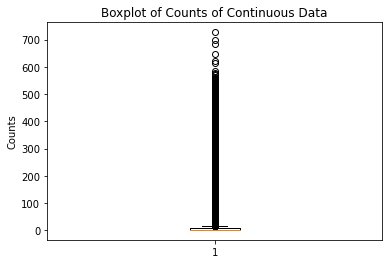

<Figure size 432x288 with 0 Axes>

In [19]:
plt.boxplot(joined_data['count']);
# plt.xlabel('')
plt.ylabel('Counts')
plt.title('Boxplot of Counts of Continuous Data')
plt.show()
plt.savefig('../plots/Boxplot of Counts of Continuous Data.png')

In [20]:
joined_data['count'].describe()

count    9.377239e+06
mean     8.221149e+00
std      1.814726e+01
min      1.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      7.000000e+00
max      7.270000e+02
Name: count, dtype: float64

In [24]:
count_mean = np.mean(joined_data['count'])
count_sd = np.std(joined_data['count'])
count_n = len(joined_data['count'])
print(count_mean)
print(count_sd)
print(count_n)

8.221148890414332
18.147260256095024
9377239


In [21]:
# discard data under 75% quantile
joined_data_75 = joined_data[joined_data['count'] >= 7]
len(joined_data_75)

2424270

In [22]:
joined_data_75['count'].describe()

count    2.424270e+06
mean     2.599186e+01
std      2.901863e+01
min      7.000000e+00
25%      1.000000e+01
50%      1.600000e+01
75%      3.000000e+01
max      7.270000e+02
Name: count, dtype: float64

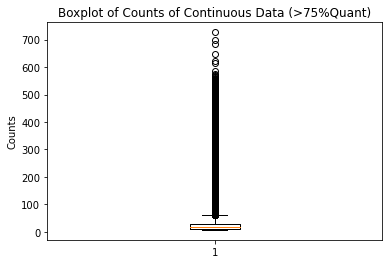

<Figure size 432x288 with 0 Axes>

In [23]:
plt.boxplot(list(joined_data_75['count']));

plt.ylabel('Counts')
plt.title('Boxplot of Counts of Continuous Data (>75%Quant)')
plt.show()
plt.savefig('../plots/Boxplot of Counts of Continuous Data (>75%Quant)')

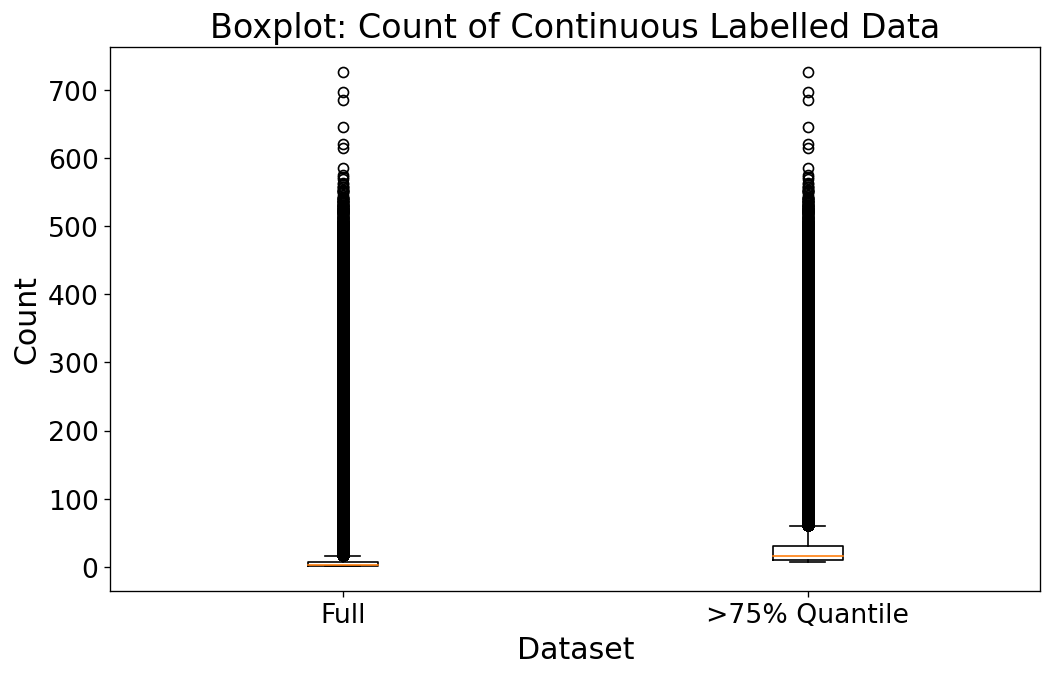

In [24]:
# Create the plot to use in report
from matplotlib.pyplot import figure
figure(figsize=(10, 6), dpi=120)

dataA = joined_data['count']

dataB = joined_data_75['count']

plt.boxplot([dataA, dataB])
plt.yticks(fontsize=16)
plt.xticks([1, 2], ['Full', '>75% Quantile'], fontsize=16)
plt.title("Boxplot: Count of Continuous Labelled Data", fontsize=20)
plt.xlabel('Dataset', fontsize=18)
plt.ylabel('Count', fontsize=18);

plt.savefig('../plots/boxplot_continuous.png')

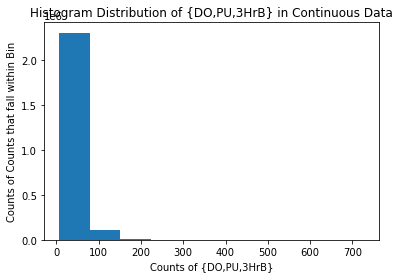

<Figure size 432x288 with 0 Axes>

In [28]:
plt.hist(list(joined_data_75['count']), bins=10);

plt.ylabel('Counts of Counts that fall within Bin')
plt.xlabel('Counts of {DO,PU,3HrB}')
plt.title('Histogram Distribution of {DO,PU,3HrB} in Continuous Data')

plt.show()
plt.savefig('../plots/Histogram Distribution of {DO,PU,3HrB} in '
            'Continuous Data (>75%Quant).png')

# One Hot Encode 3 Hour Block (from original data)

In [28]:
ohe = OneHotEncoder(handle_unknown='ignore')

joined_to_ohe = joined_data_75[['hour']]
joined_ohe = ohe.fit_transform(joined_to_ohe).toarray()

joined_ohe = pd.DataFrame(joined_ohe, columns=list(ohe.get_feature_names_out(['hour'])))

joined_data_75 = joined_data_75.drop(['hour'], axis=1)

for col in joined_ohe.columns:
    new_col = joined_ohe[col]
    new_col.index = range(len(new_col))

    joined_data_75[str(col)] = new_col

joined_data_75

,DOLocationID,PULocationID,datetime,count,weekdaylabel1_weekday,weekdaylabel1_weekend,weekdaylabel2_weekday,weekdaylabel2_friday,weekdaylabel2_weekend,tempmax,...,holiday1,holiday2,hour_0,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7
30,1,186,2016-01-01,7,1,0,0,1,0,5.8,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48,1,68,2016-01-01,8,1,0,0,1,0,5.8,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
62,1,161,2016-01-01,9,1,0,0,1,0,5.8,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
65,1,164,2016-01-01,8,1,0,0,1,0,5.8,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
73,1,230,2016-01-01,9,1,0,0,1,0,5.8,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1546439,263,239,2016-06-14,37,1,0,1,0,0,26.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1546440,263,246,2016-06-14,7,1,0,1,0,0,26.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1546441,263,249,2016-06-14,17,1,0,1,0,0,26.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1546445,263,262,2016-06-14,14,1,0,1,0,0,26.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [29]:
joined_data_75

,DOLocationID,PULocationID,datetime,count,weekdaylabel1_weekday,weekdaylabel1_weekend,weekdaylabel2_weekday,weekdaylabel2_friday,weekdaylabel2_weekend,tempmax,...,holiday1,holiday2,hour_0,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7
30,1,186,2016-01-01,7,1,0,0,1,0,5.8,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48,1,68,2016-01-01,8,1,0,0,1,0,5.8,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
62,1,161,2016-01-01,9,1,0,0,1,0,5.8,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
65,1,164,2016-01-01,8,1,0,0,1,0,5.8,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
73,1,230,2016-01-01,9,1,0,0,1,0,5.8,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1546439,263,239,2016-06-14,37,1,0,1,0,0,26.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1546440,263,246,2016-06-14,7,1,0,1,0,0,26.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1546441,263,249,2016-06-14,17,1,0,1,0,0,26.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1546445,263,262,2016-06-14,14,1,0,1,0,0,26.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


# Train Test Split

In [30]:
# Train: between Jan01 and May10
Train = joined_data_75[joined_data_75['datetime'] <=
                       datetime.date(year=2016, month=5, day=10)]

# Val: between May11 and Jun5
Validate = joined_data_75[(joined_data_75['datetime'] >=
                           datetime.date(year=2016, month=5, day=11)) &
                          (joined_data_75['datetime'] <=
                           datetime.date(year=2016, month=6, day=5))]

# Test: between Jun6 and Jun30
Test =joined_data_75[(joined_data_75['datetime'] >=
                      datetime.date(year=2016, month=6, day=6)) &
                     ((joined_data_75['datetime'] <=
                       datetime.date(year=2016, month=6, day=30)))]

In [31]:
Train

,DOLocationID,PULocationID,datetime,count,weekdaylabel1_weekday,weekdaylabel1_weekend,weekdaylabel2_weekday,weekdaylabel2_friday,weekdaylabel2_weekend,tempmax,...,holiday1,holiday2,hour_0,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7
30,1,186,2016-01-01,7,1,0,0,1,0,5.8,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48,1,68,2016-01-01,8,1,0,0,1,0,5.8,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
62,1,161,2016-01-01,9,1,0,0,1,0,5.8,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
65,1,164,2016-01-01,8,1,0,0,1,0,5.8,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
73,1,230,2016-01-01,9,1,0,0,1,0,5.8,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1631084,263,238,2016-05-10,29,1,0,1,0,0,16.8,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1631085,263,239,2016-05-10,40,1,0,1,0,0,16.8,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1631089,263,249,2016-05-10,22,1,0,1,0,0,16.8,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1631092,263,262,2016-05-10,17,1,0,1,0,0,16.8,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


# Standardisation

In [32]:
for col in Train.columns:
    if col not in ['PULocationID', 'DOLocationID', 'hour', 'count',
                   'datetime', 'preciptype_none', 'preciptype_rain',
                   'preciptype_rain,snow', 'preciptype_snow', 'conditions_Clear',
                   'conditions_Overcast', 'conditions_Partially cloudy',
                   'conditions_Rain', 'conditions_Rain, Overcast',
                   'conditions_Rain, Partially cloudy',
                   'conditions_Snow, Partially cloudy',
                   'conditions_Snow, Rain', 'conditions_Snow, Rain, Overcast',
                   'conditions_Snow, Rain, Partially cloudy',
                   'conditions_Snow, Rain, Partially cloudy', 'holiday1',
                   'holiday2', 'weekdaylabel1_weekday', 'weekdaylabel1_weekend',
                   'weekdaylabel2_weekday', 'weekdaylabel2_friday',
                   'weekdaylabel2_weekend', 'hour_0', 'hour_1', 'hour_2', 'hour_3',
                   'hour_4', 'hour_5', 'hour_6', 'hour_7']:
        print(col)

        # use train data mean and std to prevent overfit
        mean = s.mean(Train[col])
        std = s.stdev(Train[col])

        # (x - mean(train))/std(train)
        Train[col] = (Train[col] - mean)/std
        Validate[col] = (Validate[col] - mean)/std
        Test[col] = (Test[col] - mean)/std

tempmax


/var/folders/xg/8w_3dndd6l5c3n99vd7vd3f40000gn/T/ipykernel_4699/3492732095.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Train[col] = (Train[col] - mean)/std
/var/folders/xg/8w_3dndd6l5c3n99vd7vd3f40000gn/T/ipykernel_4699/3492732095.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Validate[col] = (Validate[col] - mean)/std
/var/folders/xg/8w_3dndd6l5c3n99vd7vd3f40000gn/T/ipykernel_4699/3492732095.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

tempmin
temp
feelslikemax
feelslikemin
feelslike
dew
humidity
precip
precipprob
precipcover
snow
snowdepth
windgust
windspeed
winddir
sealevelpressure
cloudcover
visibility
solarradiation
solarenergy
uvindex
sunrise
sunset
moonphase


In [34]:
# create directory if not exist
output_relative_dirs = ['../data/curated/ModelBuilding/Continuous',
                        '../data/curated/ModelBuilding/ContinuousKBest']

# check if it exists as it makedir will raise an error if it does exist
for output_relative_dir in output_relative_dirs:
    if not os.path.exists(output_relative_dir):
        os.makedirs(output_relative_dir)

In [35]:
# Export cleaned data with all columns in case need to re-select features - trade space for time
Train.to_csv('../data/curated/ModelBuilding/Continuous/FullTrain_16-1_16-5.csv', index = False)
Validate.to_csv('../data/curated/ModelBuilding/Continuous/FullVal_16-5_16-6.csv', index = False)
Test.to_csv('../data/curated/ModelBuilding/Continuous/FullTest_16-6_16-6.csv', index = False)

# PCA (ATTEMPTED, NOT SUCCESSFUL)

In [1]:
X = Train.drop(['datetime', 'DOLocationID', 'count'], axis = 1)
y = Train['count']

In [ ]:
X.head()

In [ ]:
# from sklearn.decomposition import PCA
# pca = PCA(n_components=10)
# pca.fit(X)
# pca_result = pca.transform(X)

In [2]:
# list(pca.explained_variance_)

In [ ]:
# pd.DataFrame(pca_result)

# Feature Selection

In [43]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [44]:
# F-test
f = SelectKBest(f_regression, k=len(X.columns))
f.fit(X,y)

/Applications/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in true_divide
  correlation_coefficient /= X_norms


SelectKBest(k=55, score_func=<function f_regression at 0x7f94b86a6160>)

In [45]:
# get the ranked features names and scores
kbest_scores1 = pd.DataFrame({'features': f.get_feature_names_out(),
                              'scores': f.scores_})
kbest_scores1 = kbest_scores1.sort_values('scores', ascending=False)
kbest_scores1

,features,scores
0,PULocationID,16534.147602
2,weekdaylabel1_weekend,2223.521728
5,weekdaylabel2_weekend,2223.521728
1,weekdaylabel1_weekday,2223.521728
3,weekdaylabel2_weekday,1247.354695
19,windgust,353.731411
18,snowdepth,325.224361
17,snow,256.474146
9,feelslikemax,238.332775
6,tempmax,231.479812


In [ ]:
# 6 months PULocationID, weeklabel1, snow, snowdepth, windgust, tempmax, windspeed, temp, tempmin, uvindex

### Select correct columns

In [1]:
# import pandas as pd
# Train = pd.read_csv('../data/curated/ModelBuilding/Continuous/FullTrain_16-1_16-5.csv')
# Validate = pd.read_csv('../data/curated/ModelBuilding/Continuous/FullVal_16-5_16-6.csv')
# Test = pd.read_csv('../data/curated/ModelBuilding/Continuous/FullTest_16-6_16-6.csv')

In [59]:
X_train = Train[['weekdaylabel1_weekday', 'weekdaylabel1_weekend', 'snowdepth',
                 'snow', 'DOLocationID', 'PULocationID', 'windgust', 'datetime',
                 'tempmax', 'windspeed', 'temp', 'tempmin', 'uvindex']]
y_train = Train[['count']]

In [60]:
X_validate = Validate[['weekdaylabel1_weekday', 'weekdaylabel1_weekend', 'snowdepth',
                       'snow', 'DOLocationID', 'PULocationID', 'windgust', 'datetime',
                       'tempmax', 'windspeed', 'temp', 'tempmin', 'uvindex']]
y_validate = Validate[['count']]

In [61]:
X_test = Test[['weekdaylabel1_weekday', 'weekdaylabel1_weekend', 'snowdepth', 'snow',
               'DOLocationID', 'PULocationID', 'windgust', 'datetime', 'tempmax',
               'windspeed', 'temp', 'tempmin', 'uvindex']]
y_test = Test[['count']]

(Create one more plot)

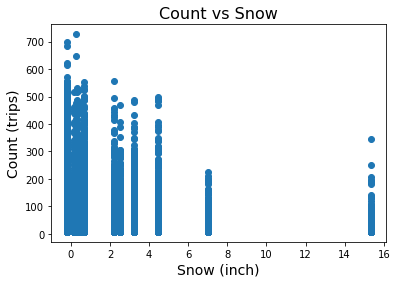

In [16]:
plt.scatter(Train['snow'], Train['count'])

plt.title("Count vs Snow", fontsize=16)
plt.xlabel('Snow (inch)', fontsize=14)
plt.ylabel('Count (trips)', fontsize=14);

plt.savefig('../plots/scatter_snow_x_count.png')

In [13]:
import numpy as np
np.corrcoef(Train['snow'], Train['count'])

array([[ 1.        , -0.01213878],
       [-0.01213878,  1.        ]])

# Export

In [62]:
X_train.to_csv('../data/curated/ModelBuilding/Continuous/XTrain_16-1_16-5.csv', index = False)
X_validate.to_csv('../data/curated/ModelBuilding/Continuous/XVal_16-5_16-6.csv', index = False)
X_test.to_csv('../data/curated/ModelBuilding/Continuous/XTest_16-6_16-6.csv', index = False)
y_train.to_csv('../data/curated/ModelBuilding/Continuous/yTrain_16-1_16-5.csv', index = False)
y_validate.to_csv('../data/curated/ModelBuilding/Continuous/yVal_16-5_16-6.csv', index = False)
y_test.to_csv('../data/curated/ModelBuilding/Continuous/yTest_16-6_16-6.csv', index = False)

In [53]:
kbest_scores1.to_csv('../data/curated/ModelBuilding/ContinuousKBest/f_16-1_16-6.csv', index=False)